In [ ]:
# Install the necessary libraries
!pip install pandas numpy scikit-learn tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, GRU, SimpleRNN, Dense, Dropout

In [ ]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:

data = pd.read_csv("/content/augmented.csv")


In [ ]:
data

,id,tweet,Hate,Type,New_Type,label,comment
0,1,Kanki ki der Allah sob samoy valo rake,Yes,Others,1,1,Kanki ki der Allah sob samoy valo rake
1,2,khanki akta,Yes,Sexual,2,1,khanki akta
2,3,Ore saniliyon,Yes,Sexual,2,1,Ore saniliyon
3,4,Bokachoda Shangbadik,Yes,Slang,3,1,Bokachoda Shangbadik
4,5,Balda dekhaiche,Yes,Slang,3,1,Balda dekhaiche
...,...,...,...,...,...,...,...
9995,1147,Ekk heroiinchi bad diya arek ganjutti appointe...,Yes,Slang,3,1,['Ekk heroiinchi tough diya arek ganjutti appo...
9996,1260,Boykot India ponno,Yes,Racial,5,1,['Boykot India ponno']
9997,3265,Kicu paite hole.. Kicu harate hoi,No,Not Hate,4,0,['Kicu paite hole. . Kicu harate hoi']
9998,400,Kichu malaun vockto abal der bolchie j pakisht...,Yes,Religious,6,1,['Kichu malaun vockto abal der bolchie j pakis...


In [ ]:
data.columns

Index(['id', 'tweet', 'Hate', 'Type', 'New_Type', 'label', 'comment'], dtype='object')

In [ ]:
data.isnull().sum()

id          0
tweet       0
Hate        0
Type        0
New_Type    0
label       0
comment     0
dtype: int64

In [ ]:
print(data['Type'].unique())

['Others' 'Sexual' 'Slang' 'Not Hate' 'Racial' 'Religious' 'Appearance']


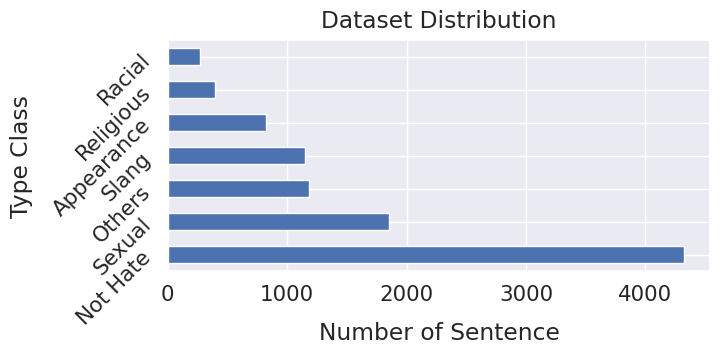

In [ ]:
sns.set(font_scale=1.4)
data['Type'].value_counts().plot(kind='barh', figsize=(7, 3))
plt.xlabel("Number of Sentence", labelpad=12)
plt.ylabel("Type Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
import re,json,nltk
from sklearn.preprocessing import LabelEncoder

In [ ]:
def process_comments(tweet):
    """Removes unnecessary punctuation from a Bangla tweet."""
    tweet = re.sub(r'[^\w\s]', '', str(tweet))
    return tweet.strip()


data['cleaned'] = data['tweet'].apply(process_comments)
sample_data = [10,25,854,966,1500,1589,1700,2200,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.tweet[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Type:-- ',data.Type[i],'\n')

Original:
 Amader ei eisob party er sponser korbe abar 
Cleaned:
 Amader ei eisob party er sponser korbe abar 
 Type:--  Not Hate 

Original:
 Ami lej kata magi 
Cleaned:
 Ami lej kata magi 
 Type:--  Slang 

Original:
 Tomader mukhe ei sob manai na 
Cleaned:
 Tomader mukhe ei sob manai na 
 Type:--  Not Hate 

Original:
 Khub valo laglo je apnara akshathe shantite bosobash korchen kintu dekhben karor jeno nojor na lage keno na jora lagte shomoy lage kintu bhangte shomoy lagena ishwar o allah apnader rokha koruk. 
Cleaned:
 Khub valo laglo je apnara akshathe shantite bosobash korchen kintu dekhben karor jeno nojor na lage keno na jora lagte shomoy lage kintu bhangte shomoy lagena ishwar o allah apnader rokha koruk 
 Type:--  Not Hate 

Original:
 Onk khela dekhaico r valooo Lage na Rong dhong, shami thakte bidubar bes vlo baro vatari 
Cleaned:
 Onk khela dekhaico r valooo Lage na Rong dhong shami thakte bidubar bes vlo baro vatari 
 Type:--  Sexual 

Original:
 seta toh nirvor kore jeh

In [ ]:
data

,id,tweet,Hate,Type,New_Type,label,comment,cleaned
0,1,Kanki ki der Allah sob samoy valo rake,Yes,Others,1,1,Kanki ki der Allah sob samoy valo rake,Kanki ki der Allah sob samoy valo rake
1,2,khanki akta,Yes,Sexual,2,1,khanki akta,khanki akta
2,3,Ore saniliyon,Yes,Sexual,2,1,Ore saniliyon,Ore saniliyon
3,4,Bokachoda Shangbadik,Yes,Slang,3,1,Bokachoda Shangbadik,Bokachoda Shangbadik
4,5,Balda dekhaiche,Yes,Slang,3,1,Balda dekhaiche,Balda dekhaiche
...,...,...,...,...,...,...,...,...
9995,1147,Ekk heroiinchi bad diya arek ganjutti appointe...,Yes,Slang,3,1,['Ekk heroiinchi tough diya arek ganjutti appo...,Ekk heroiinchi bad diya arek ganjutti appointed
9996,1260,Boykot India ponno,Yes,Racial,5,1,['Boykot India ponno'],Boykot India ponno
9997,3265,Kicu paite hole.. Kicu harate hoi,No,Not Hate,4,0,['Kicu paite hole. . Kicu harate hoi'],Kicu paite hole Kicu harate hoi
9998,400,Kichu malaun vockto abal der bolchie j pakisht...,Yes,Religious,6,1,['Kichu malaun vockto abal der bolchie j pakis...,Kichu malaun vockto abal der bolchie j pakisht...


In [ ]:
# Preprocess the text data
X = data['cleaned']
y = data['label']  # 'label' contains hate speech categories

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

In [ ]:
# Tokenize the text data
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)  # You can adjust the sequence length as needed

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [ ]:
# Define and train the Bidirectional LSTM model
model_bidirectional_lstm = Sequential()
model_bidirectional_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model_bidirectional_lstm.add(Bidirectional(LSTM(256)))
model_bidirectional_lstm.add(Dense(64, activation='relu'))
model_bidirectional_lstm.add(Dropout(0.6))
model_bidirectional_lstm.add(Dense(num_classes, activation='softmax'))
model_bidirectional_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_bidirectional_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
200/200 [==============================] - 174s 851ms/step - loss: 0.5616 - accuracy: 0.6950 - val_loss: 0.4612 - val_accuracy: 0.7837
Epoch 2/10
200/200 [==============================] - 143s 715ms/step - loss: 0.2703 - accuracy: 0.8972 - val_loss: 0.3825 - val_accuracy: 0.8537
Epoch 3/10
200/200 [==============================] - 144s 720ms/step - loss: 0.1473 - accuracy: 0.9472 - val_loss: 0.4430 - val_accuracy: 0.8612
Epoch 4/10
200/200 [==============================] - 146s 730ms/step - loss: 0.0844 - accuracy: 0.9725 - val_loss: 0.4099 - val_accuracy: 0.8650
Epoch 5/10
200/200 [==============================] - 141s 708ms/step - loss: 0.0676 - accuracy: 0.9784 - val_loss: 0.5673 - val_accuracy: 0.8813
Epoch 6/10
200/200 [==============================] - 138s 689ms/step - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.6266 - val_accuracy: 0.8856
Epoch 7/10
200/200 [==============================] - 142s 709ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.6945 -

In [ ]:
# Define and train the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model_cnn.add(Conv1D(128, 3, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.6))
model_cnn.add(Dense(num_classes, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 8s 34ms/step - loss: 0.5964 - accuracy: 0.6630 - val_loss: 0.4179 - val_accuracy: 0.8200
Epoch 2/10
200/200 [==============================] - 7s 37ms/step - loss: 0.2617 - accuracy: 0.9002 - val_loss: 0.3227 - val_accuracy: 0.8756
Epoch 3/10
200/200 [==============================] - 6s 31ms/step - loss: 0.0946 - accuracy: 0.9695 - val_loss: 0.3634 - val_accuracy: 0.8900
Epoch 4/10
200/200 [==============================] - 8s 38ms/step - loss: 0.0371 - accuracy: 0.9914 - val_loss: 0.4473 - val_accuracy: 0.8981
Epoch 5/10
200/200 [==============================] - 6s 31ms/step - loss: 0.0184 - accuracy: 0.9955 - val_loss: 0.5214 - val_accuracy: 0.8994
Epoch 6/10
200/200 [==============================] - 7s 37ms/step - loss: 0.0100 - accuracy: 0.9978 - val_loss: 0.5765 - val_accuracy: 0.8888
Epoch 7/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.6298 - val_accuracy: 0.8925

In [ ]:
# Define and train the GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model_gru.add(GRU(128))
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dropout(0.6))
model_gru.add(Dense(num_classes, activation='softmax'))
model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 28s 128ms/step - loss: 0.5726 - accuracy: 0.6942 - val_loss: 0.4198 - val_accuracy: 0.8163
Epoch 2/10
200/200 [==============================] - 23s 117ms/step - loss: 0.2551 - accuracy: 0.9034 - val_loss: 0.3667 - val_accuracy: 0.8662
Epoch 3/10
200/200 [==============================] - 25s 125ms/step - loss: 0.1193 - accuracy: 0.9589 - val_loss: 0.4617 - val_accuracy: 0.8712
Epoch 4/10
200/200 [==============================] - 25s 127ms/step - loss: 0.0677 - accuracy: 0.9778 - val_loss: 0.5385 - val_accuracy: 0.8913
Epoch 5/10
200/200 [==============================] - 25s 127ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.5519 - val_accuracy: 0.8913
Epoch 6/10
200/200 [==============================] - 23s 116ms/step - loss: 0.0343 - accuracy: 0.9906 - val_loss: 0.6104 - val_accuracy: 0.8831
Epoch 7/10
200/200 [==============================] - 25s 127ms/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.8455 - val_ac

In [ ]:
# Define and train the Simple RNN model
model_simple_rnn = Sequential()
model_simple_rnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model_simple_rnn.add(SimpleRNN(128))
model_simple_rnn.add(Dense(64, activation='relu'))
model_simple_rnn.add(Dropout(0.6))
model_simple_rnn.add(Dense(num_classes, activation='softmax'))
model_simple_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_simple_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 12s 53ms/step - loss: 0.6597 - accuracy: 0.6022 - val_loss: 0.5918 - val_accuracy: 0.7294
Epoch 2/10
200/200 [==============================] - 10s 52ms/step - loss: 0.3329 - accuracy: 0.8664 - val_loss: 0.3798 - val_accuracy: 0.8494
Epoch 3/10
200/200 [==============================] - 9s 43ms/step - loss: 0.1076 - accuracy: 0.9605 - val_loss: 0.4627 - val_accuracy: 0.8650
Epoch 4/10
200/200 [==============================] - 10s 52ms/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.5618 - val_accuracy: 0.8744
Epoch 5/10
200/200 [==============================] - 10s 51ms/step - loss: 0.0162 - accuracy: 0.9961 - val_loss: 0.6731 - val_accuracy: 0.8731
Epoch 6/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0171 - accuracy: 0.9966 - val_loss: 0.6903 - val_accuracy: 0.8719
Epoch 7/10
200/200 [==============================] - 10s 51ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.7748 - val_accuracy: 0

In [ ]:

# Define and train the CNN + LSTM hybrid model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model_cnn_lstm.add(Conv1D(128, 3, activation='relu'))
model_cnn_lstm.add(Bidirectional(LSTM(528)))
model_cnn_lstm.add(Dense(64, activation='relu'))
model_cnn_lstm.add(Dropout(0.6))
model_cnn_lstm.add(Dense(num_classes, activation='softmax'))
model_cnn_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
200/200 [==============================] - 419s 2s/step - loss: 0.5772 - accuracy: 0.6875 - val_loss: 0.4667 - val_accuracy: 0.8081
Epoch 2/10
200/200 [==============================] - 409s 2s/step - loss: 0.2489 - accuracy: 0.9097 - val_loss: 0.4138 - val_accuracy: 0.8469
Epoch 3/10
200/200 [==============================] - 415s 2s/step - loss: 0.0886 - accuracy: 0.9708 - val_loss: 0.4614 - val_accuracy: 0.8819
Epoch 4/10
200/200 [==============================] - 416s 2s/step - loss: 0.0355 - accuracy: 0.9898 - val_loss: 0.6709 - val_accuracy: 0.8744
Epoch 5/10
200/200 [==============================] - 415s 2s/step - loss: 0.0169 - accuracy: 0.9950 - val_loss: 0.8186 - val_accuracy: 0.8712
Epoch 6/10
200/200 [==============================] - 417s 2s/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.8577 - val_accuracy: 0.8756
Epoch 7/10
200/200 [==============================] - 418s 2s/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.9908 - val_accuracy: 0.8781

In [ ]:
from sklearn.metrics import classification_report

# Function to evaluate and print classification report
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Decode the labels
    y_true = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

    # Print classification report
    print(classification_report(y_true, y_pred_labels))

# Evaluate each model
print("Bidirectional LSTM Model:")
evaluate_model(model_bidirectional_lstm, X_test, y_test)

print("CNN Model:")
evaluate_model(model_cnn, X_test, y_test)

print("GRU Model:")
evaluate_model(model_gru, X_test, y_test)

print("Simple RNN Model:")
evaluate_model(model_simple_rnn, X_test, y_test)

print("CNN + LSTM Hybrid Model:")
evaluate_model(model_cnn_lstm, X_test, y_test)


Bidirectional LSTM Model:
63/63 [==============================] - 12s 169ms/step
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       880
           1       0.90      0.92      0.91      1120

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.90      0.89      2000

CNN Model:
63/63 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       880
           1       0.90      0.91      0.90      1120

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

GRU Model:
63/63 [==============================] - 2s 25ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       880
           1       0.91   